import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**# Data Preprocessing**

**## Training Image Preprocessing**

In [43]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


**## Validation Image Processing**

In [44]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [45]:
training_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [46]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 60.75  61.75  81.75]
   [ 61.75  62.75  83.  ]
   [ 62.25  63.25  83.25]
   ...
   [ 39.    37.5   55.5 ]
   [ 48.25  46.    64.75]
   [ 52.75  50.5   69.25]]

  [[127.75 129.75 153.25]
   [125.5  127.5  151.  ]
   [130.75 132.75 156.25]
   ...
   [ 79.75  76.    99.  ]
   [ 87.75  84.   107.  ]
   [ 99.5   95.75 118.75]]

  [[134.   135.25 163.  ]
   [126.   127.25 155.  ]
   [123.   124.25 152.  ]
   ...
   [ 91.    86.75 114.  ]
   [ 91.75  87.5  114.75]
   [ 99.75  95.5  122.75]]

  ...

  [[136.5  137.5  168.5 ]
   [130.5  131.5  162.5 ]
   [133.25 134.25 165.25]
   ...
   [105.    94.   124.  ]
   [102.75  91.75 121.75]
   [ 89.5   78.5  108.5 ]]

  [[137.25 138.25 169.25]
   [131.25 132.25 163.25]
   [134.   135.   166.  ]
   ...
   [ 98.    87.   117.  ]
   [ 98.5   87.5  117.5 ]
   [ 94.5   83.5  113.5 ]]

  [[135.75 136.75 167.75]
   [134.25 135.25 166.25]
   [138.5  139.5  170.5 ]
   ...
   [103.75  92.75 122.75]
   [100.    89.   119.  ]
   [107.25  96.25 12

**To avoid Overshooting**
1. Choose small learning rate default 0.001 but we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more features from the images there may a possibility that the model is unable to capture relevant feature or the model is confusing due to lack of feature so feed with more features

**## Building Model**

In [47]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [48]:
model = Sequential()

In [49]:
## Building Convolution layer

In [50]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [51]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [52]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [53]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [54]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [55]:
model.add(Dropout(0.25)) #To avoid overfitting

In [56]:
model.add(Flatten())

In [57]:
model.add(Dense(units=1500,activation='relu'))

In [58]:
model.add(Dropout(0.4))

In [59]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

**## Compiling Model**

In [60]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

**###Model Training**

In [62]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1199s 544ms/step - accuracy: 0.4137 - loss: 2.0821 - val_accuracy: 0.8613 - val_loss: 0.4365
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1106s 503ms/step - accuracy: 0.8421 - loss: 0.4953 - val_accuracy: 0.9227 - val_loss: 0.2451
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1096s 499ms/step - accuracy: 0.9091 - loss: 0.2797 - val_accuracy: 0.9304 - val_loss: 0.2109
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1113s 507ms/step - accuracy: 0.9376 - loss: 0.1910 - val_accuracy: 0.9495 - val_loss: 0.1567
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1127s 513ms/step - accuracy: 0.9528 - loss: 0.1428 - val_accuracy: 0.9557 - val_loss: 0.1395
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1124s 512ms/step - accuracy: 0.9631 - loss: 0.1113 - val_accuracy: 0.9619 - val_loss: 0.1202
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1162s 529ms/step - accuracy: 0.9710 - loss: 0.0874 - val_accuracy: 0.9566 - val_loss: 0.1423
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1166s 531ms/s

**## Model Evaluation**

In [63]:
#Model evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 239s 109ms/step - accuracy: 0.9844 - loss: 0.0495


In [64]:
print(train_loss,train_acc)

0.043781958520412445 0.9857173562049866


In [65]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 64s 116ms/step - accuracy: 0.9560 - loss: 0.1622


In [66]:
print(val_loss,val_acc)

0.16308008134365082 0.9552697539329529


**## Saving Model**

In [68]:
model.save("trained_model.keras")

In [69]:
training_history.history

{'accuracy': [0.6185077428817749,
  0.8644711375236511,
  0.9185859560966492,
  0.9427697658538818,
  0.9567963480949402,
  0.9650615453720093,
  0.9715484976768494,
  0.9758161902427673,
  0.9794579744338989,
  0.9826588034629822],
 'loss': [1.301702857017517,
  0.4270838499069214,
  0.25144919753074646,
  0.17655426263809204,
  0.13170653581619263,
  0.10474231094121933,
  0.08553316444158554,
  0.07624724507331848,
  0.061744701117277145,
  0.05357646569609642],
 'val_accuracy': [0.8612565398216248,
  0.9227179884910583,
  0.9304006099700928,
  0.9495219588279724,
  0.9556680917739868,
  0.9619280695915222,
  0.9566355347633362,
  0.9640905857086182,
  0.9613589644432068,
  0.9552697539329529],
 'val_loss': [0.43649595975875854,
  0.24509459733963013,
  0.21088868379592896,
  0.15674643218517303,
  0.13949799537658691,
  0.12020803987979889,
  0.14230193197727203,
  0.11668143421411514,
  0.13144411146640778,
  0.16308008134365082]}

In [70]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [73]:
training_history.history['val_accuracy']

[0.8612565398216248,
 0.9227179884910583,
 0.9304006099700928,
 0.9495219588279724,
 0.9556680917739868,
 0.9619280695915222,
 0.9566355347633362,
 0.9640905857086182,
 0.9613589644432068,
 0.9552697539329529]

**#Accuracy Visualization**

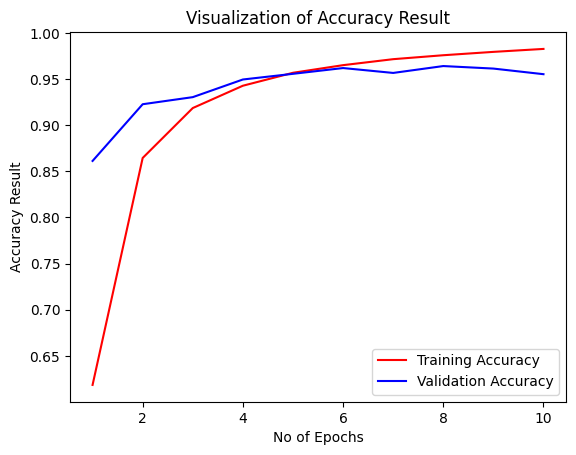

In [77]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

**## Some other mectrics for model evaluation**

In [89]:
class_name = validation_set.class_names

In [90]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [91]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 74s 134ms/step


(array([[1.00000000e+00, 3.53057063e-11, 1.76505390e-13, ...,
         5.69916844e-19, 1.14633394e-17, 1.34197177e-15],
        [1.00000000e+00, 5.89101955e-13, 4.89649597e-12, ...,
         2.74224009e-20, 1.88558613e-16, 1.65381674e-16],
        [1.00000000e+00, 4.10402940e-13, 1.19562502e-11, ...,
         2.44657472e-20, 6.63521650e-15, 1.92424574e-14],
        ...,
        [2.55173518e-06, 1.42079752e-08, 1.21170137e-06, ...,
         9.07571263e-08, 2.93647551e-09, 9.96657610e-01],
        [1.43184548e-06, 3.84682286e-09, 1.83956581e-06, ...,
         8.64930314e-07, 6.78163614e-09, 9.99843836e-01],
        [1.43816423e-18, 2.86153889e-18, 1.72401261e-16, ...,
         2.99303724e-19, 7.55467362e-17, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [92]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [93]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [94]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [95]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

**## Precision Recall**

In [99]:
from sklearn.metrics import classification_report,confusion_matrix

In [97]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.95      0.96       504
                                 Apple___Black_rot       0.99      0.94      0.96       497
                          Apple___Cedar_apple_rust       0.94      0.98      0.96       440
                                   Apple___healthy       0.97      0.93      0.95       502
                               Blueberry___healthy       0.99      0.93      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.86      1.00      0.93       421
                 Cherry_(including_sour)___healthy       1.00      0.95      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.93      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.97      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.95      0.

In [100]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[478,   1,   0, ...,   0,   2,   0],
       [  1, 465,   4, ...,   0,   1,   0],
       [  0,   0, 432, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 482,   0,   0],
       [  0,   0,   0, ...,   0, 444,   0],
       [  1,   0,   1, ...,   0,   0, 471]], dtype=int64)

**## Confusion Matrix Visualization**

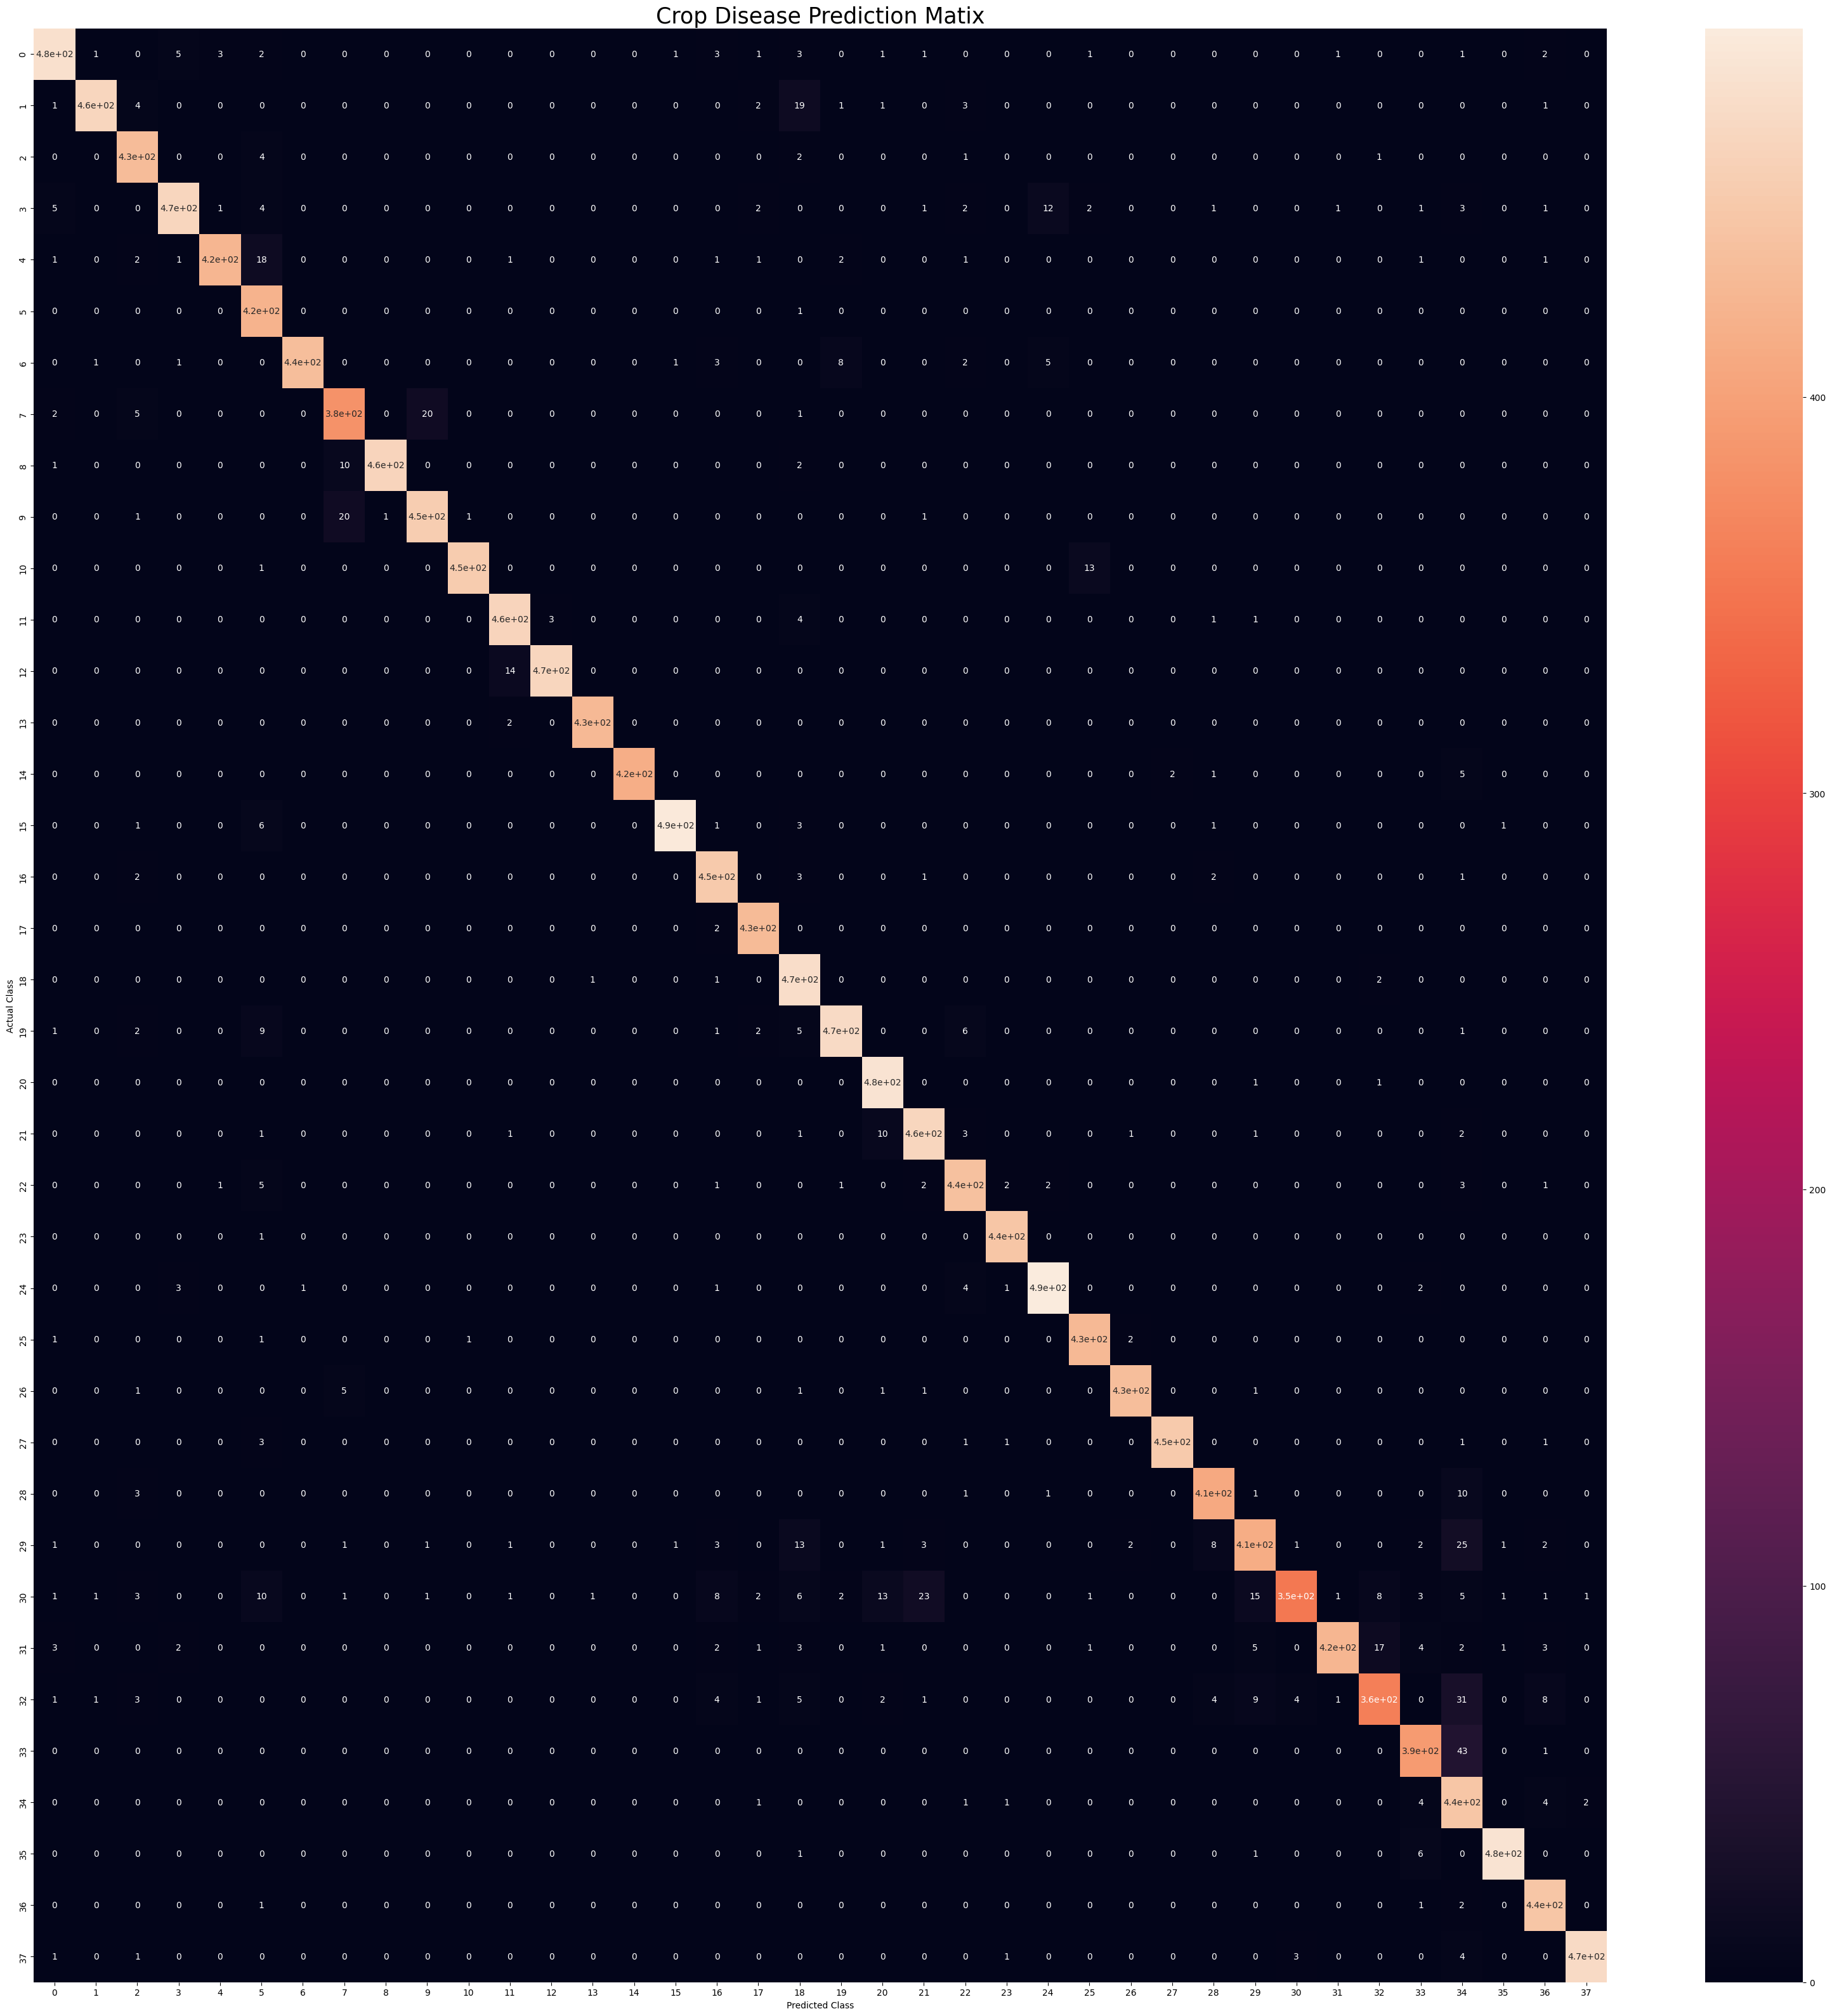

In [109]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Crop Disease Prediction Matix",fontsize=25)
plt.show()